In [1]:
import os
os.chdir('/Users/azizbenmosbah/PycharmProjects/nlp-getting-started')
import pandas as pd 
from Pipelines.main import tfidf_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from wordcloud import WordCloud

In [2]:
X_train, X_test, y_train, y_test = tfidf_pipeline('/Users/azizbenmosbah/PycharmProjects/nlp-getting-started/Data/train.csv')

In [3]:
X_train.head()

,id,keyword,location,text,text_original,10,11,11yearold,12,15,...,wreck,wreckag,wrong,yeah,year,yes,youtub,zone,û_,ûò
0,5187,fatalities,"Youngstown, OH",osp concern about mount fatal,OSP concerned about mounting fatalities http:/...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,981,blazing,,real vibez radio blaze the best vibez nowplay ...,REAL ViBEZ RADIO - BLAZING THE BEST VIBEZ!!! h...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4341,dust%20storm,"Atlanta, GA",deadlydemi even stay up all night to he barrie...,@deadlydemi even staying up all night to he ba...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80,ablaze,South Africa,truck ablaz r21 voortrekk ave outsid or tambo ...,TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSIDE O...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6925,mass%20murderer,"Huntsville, AL",theeconomist step one get that mass murder por...,@TheEconomist Step one: get that mass murderer...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_train_tfidf = X_train.loc[:,X_train.columns[5:]]
X_test_tfidf = X_test.loc[:,X_test.columns[5:]]

In [12]:
param_grid = {'C': [1.127,1.128, 1.13], 'penalty':['l1', 'l2'], 'solver':['liblinear']}
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 10, scoring = 'f1')
clf.fit(X_train_tfidf , y_train)
clf.best_params_

{'C': 1.128, 'penalty': 'l2', 'solver': 'liblinear'}

In [13]:
confusion_matrix(y_test, clf.predict(X_test_tfidf))

array([[748, 113],
       [245, 416]])

In [14]:
print(classification_report(y_test,clf.predict(X_test_tfidf) , labels=[1]))

              precision    recall  f1-score   support

           1       0.79      0.63      0.70       661

   micro avg       0.79      0.63      0.70       661
   macro avg       0.79      0.63      0.70       661
weighted avg       0.79      0.63      0.70       661



After removing urls and emojis and stemming we have a non significantly smaller of classifications, this indicates that removing all this information from the text not only allows for better analytics but also does not affect modeling performances - TF-IDF.

### Analytics

In [7]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 15})
            
def display_wordcloud(tweets: pd.Series):
    tweets['text']

### TF-IDF

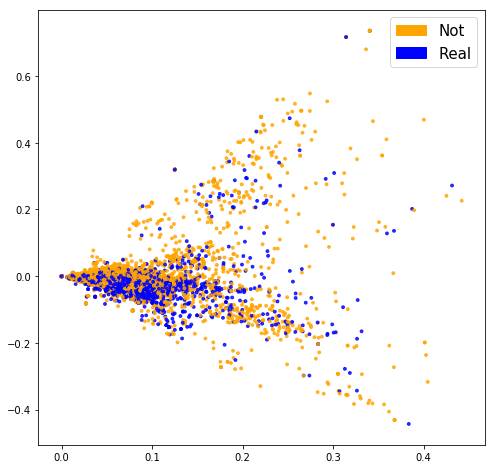

In [6]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

### Hashing Vectorizer 

In [3]:
X_train, X_test, y_train, y_test = tfidf_pipeline('/Users/azizbenmosbah/PycharmProjects/nlp-getting-started/Data/train.csv', vectorizer = "hash")

In [5]:
X_train_hash = X_train.loc[:,X_train.columns[5:]]
X_test_hash = X_test.loc[:,X_test.columns[5:]]

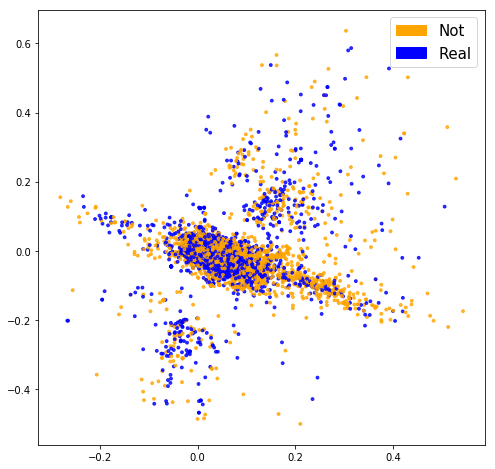

In [8]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train_hash, y_train)
plt.show()

### Count Vectorizer 

In [9]:
X_train, X_test, y_train, y_test = tfidf_pipeline('/Users/azizbenmosbah/PycharmProjects/nlp-getting-started/Data/train.csv', vectorizer = "count")

In [10]:
X_train_count = X_train.loc[:,X_train.columns[5:]]
X_test_count = X_test.loc[:,X_test.columns[5:]]

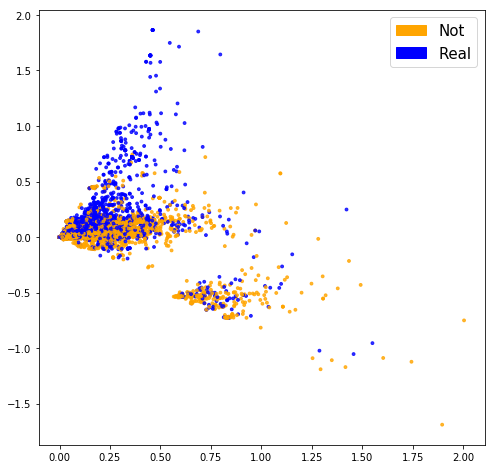

In [11]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train_count, y_train)
plt.show()

### WordCloud

In [27]:
corpus_disaster = " ".join(X_train[y_train == 1].text.tolist())
corpus_no_disaster = " ".join(X_train[y_train != 1].text.tolist())

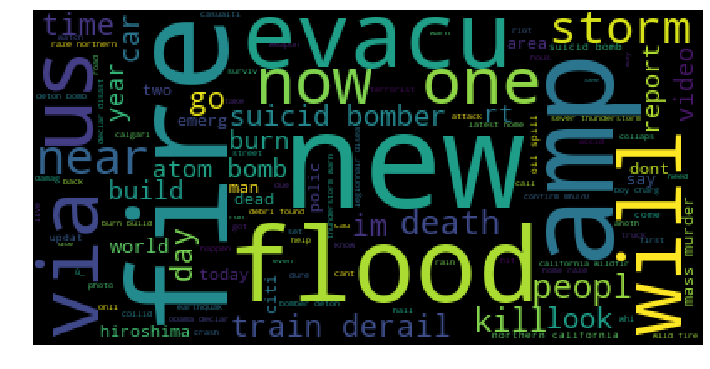

In [28]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(corpus_disaster)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

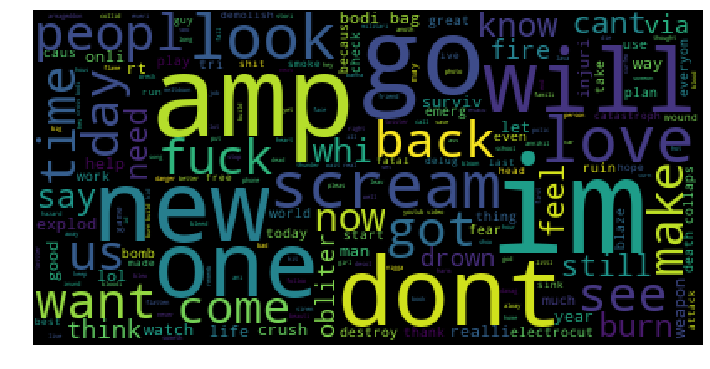

In [32]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(corpus_no_disaster)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()